In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
#data set 
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])


dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


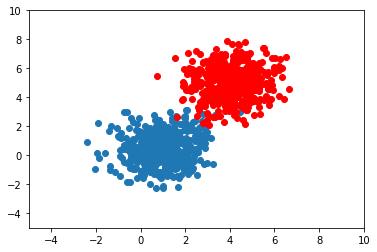

In [19]:
#plotting of data
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='red')
plt.show()

In [20]:
#total no rows for combining data
r = dist_01.shape[0] + dist_02.shape[0]
# 1 extra column for adding labels
c = dist_01.shape[1] + 1
# new blank array
data = np.zeros((r, c))
print data.shape

#adding data
data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
#adding labels
data[dist_01.shape[0]:, -1] = 1.0

print data.mean(axis=0)

(1000, 3)
[ 2.50393407  2.776664    0.5       ]


In [21]:
#shuffling dataset values
np.random.shuffle(data)
print data[:10]

[[ 2.08011093  0.01370551  0.        ]
 [ 3.19880142  5.53947067  1.        ]
 [ 1.77530105  0.22944867  0.        ]
 [ 3.22944788  5.59570735  1.        ]
 [ 0.1094424  -0.10023525  0.        ]
 [ 4.15583793  6.57184102  1.        ]
 [ 1.70442587 -0.3130893   0.        ]
 [ 5.52515337  7.39904235  1.        ]
 [ 3.64053413  4.37620277  1.        ]
 [ 0.16371595 -1.34250322  0.        ]]


In [22]:
def distance(x1, x2):
    # euclidean distance
    d = np.sqrt(((x1-x2)**2).sum())
    return d

def knn(X_train, y_train, xt, k=7):
    vals = []
    for ix in range(X_train.shape[0]):
        d = distance(X_train[ix], xt)
        vals.append([d, y_train[ix]])
    sorted_labels = sorted(vals, key=lambda z: z[0])
    # storing first k nearest values 
    neighbours = np.asarray(sorted_labels)[:k, -1]
    # counting frequency of unique labels
    freq = np.unique(neighbours, return_counts=True)
    
    return freq[0][freq[1].argmax()]

In [23]:
test_point = np.array([8, -4])

print knn(data[:, :2], data[:, -1], test_point)

0.0


In [24]:
np.random.shuffle(data)
split = int(0.75 * data.shape[0])
# splitting of data into training and testing part
train_data_X = data[:split, :2]
train_data_y = data[:split, -1]
test_data_X = data[split:, :2]
test_data_y = data[split:, -1]

print train_data_X.shape, train_data_y.shape
print test_data_X.shape, test_data_y.shape

(750, 2) (750,)
(250, 2) (250,)


In [27]:
def get_acc(kx):
    #empty list for storing predictions
    preds = []
    # predict value of every test point
    for ix in range(test_data_X.shape[0]):
        preds.append(knn(train_data_X, train_data_y, test_data_X[ix], k=kx))

        
    preds = np.asarray(preds)
    #comparing predicted value with actual value
    return 100*float((test_data_y == preds).sum())/preds.shape[0]

print get_acc(7)

98.8


In [26]:
# accuracy for different k values from 2 to 19
for ix in range(2, 20):
    print "k:", ix, "| Acc:", get_acc(ix)

k: 2 | Acc: 96.8
k: 3 | Acc: 98.8
k: 4 | Acc: 98.0
k: 5 | Acc: 98.8
k: 6 | Acc: 98.4
k: 7 | Acc: 98.8
k: 8 | Acc: 98.8
k: 9 | Acc: 98.8
k: 10 | Acc: 98.8
k: 11 | Acc: 98.8
k: 12 | Acc: 98.8
k: 13 | Acc: 98.8
k: 14 | Acc: 98.8
k: 15 | Acc: 98.8
k: 16 | Acc: 98.8
k: 17 | Acc: 98.8
k: 18 | Acc: 98.8
k: 19 | Acc: 98.8
